## Run XGBoost, Produce SHAP Visualization from PCA Input    

In [3]:
#(run pip install shap if you don't have)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('/Users/mcott/Desktop/UMich/Milestone II/trunc-svd_dbscan_fixed.csv',dtype={1: str})
#df.tail(5)

chi_bus_df = df[(df['mode'] == 'bus') & (df['state'] == 'CHI')]
chi_train_df = df[(df['mode'] == 'train') & (df['state'] == 'CHI')]
nyc_bus_df = df[(df['mode'] == 'bus') & (df['state'] == 'NYC')]
nyc_train_df = df[(df['mode'] == 'subway') & (df['state'] == 'NYC')]
#nyc_train_df.head(5)

### XGBoost

In [17]:
def XGBoost_SHAP(df): #add other hyperparameters here
    
    # Prepare data
    # invalid columns for model - 'date','unit_id','state','mode' 
    target_col = 'daily_ridership'
    X = df.drop(columns=[target_col,'date','unit_id','state','mode'])
    y = df[target_col]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
    
    # Train XGBoost model
    model = XGBRegressor(eval_metric='logloss')
    model.fit(X_train, y_train)
    
    # SHAP values
    explainer = shap.Explainer(model, X_train, seed=9)
    shap_values = explainer(X_train)

    # Create SHAP Beeswarm plot (similar to summary plot, better performance with large datasets)
    plt.figure(figsize=(10, 8))
    shap.plots.beeswarm(shap_values, show=False)
    plt.title('SHAP Beeswarm Plot - Feature Importance')
    plt.tight_layout()
    plt.show()

    # SHAP Waterfall plot example (only shows feature importance for a single prediction)
    '''
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_train, show=False)
    plt.title('SHAP Summary Plot - Feature Importance')
    plt.tight_layout()
    plt.show()
    '''

    # SHAP force plot example(only shows feature importance for a single prediction)
    '''
    shap.force_plot(explainer.expected_value,shap_values[0], X_test.iloc[0, :], matplotlib=True)
    '''

    return model, X_train, X_test, y_train, y_test, shap_values

### SHAP Viz

100%|===================| 249430/249867 [09:18<00:00]        

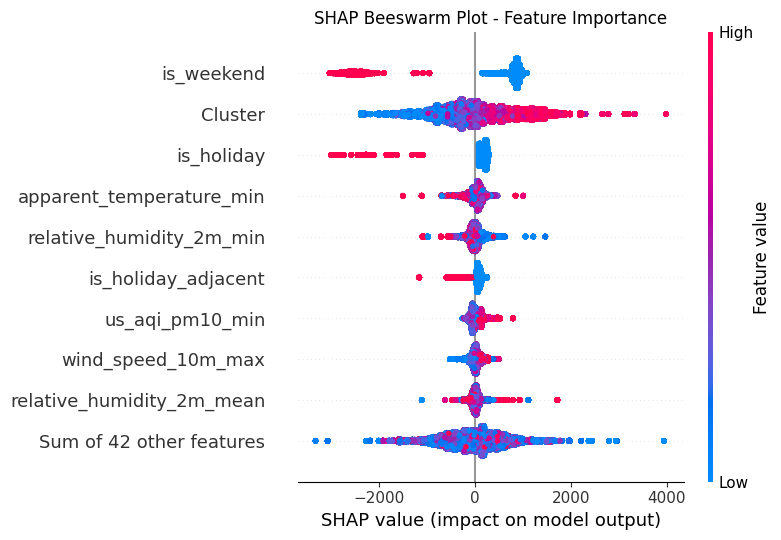

In [ ]:
# Uncomment to run function for each dataset

mod_cb,X_train_cb,X_test_cb,y_train_cb,y_test_cb,chi_bus_SHAP = XGBoost_SHAP(chi_bus_df)
mod_ct,X_train_ct,X_test_ct,y_train_ct,y_test_ct,chi_train_SHAP = XGBoost_SHAP(chi_train_df)
mod_nb,X_train_nb,X_test_nb,y_train_nb,y_test_nb,nyc_bus_SHAP = XGBoost_SHAP(nyc_bus_df)
mod_nt,X_train_nt,X_test_nt,y_train_nt,y_test_nt,nyc_train_SHAP = XGBoost_SHAP(nyc_train_df)

### XGBoost Model Accuracy 

In [ ]:
# Chicago Bus
y_pred_cb = mod_cb.predict(X_test_cb)
mae_cb = mean_absolute_error(y_test_cb, y_pred_cb)
r2_cb = r2_score(y_test_cb, y_pred_cb)
print(f"Chicago Bus - MAE: {mae_cb:.2f}, R²: {r2_cb:.3f}")

# Chicago Train
y_pred_ct = mod_ct.predict(X_test_ct)
mae_ct = mean_absolute_error(y_test_ct, y_pred_ct)
r2_ct = r2_score(y_test_ct, y_pred_ct)
print(f"Chicago Train - MAE: {mae_ct:.2f}, R²: {r2_ct:.3f}")

# NYC Bus
y_pred_nb = mod_nb.predict(X_test_nb)
mae_nb = mean_absolute_error(y_test_nb, y_pred_nb)
r2_nb = r2_score(y_test_nb, y_pred_nb)
print(f"NYC Bus - MAE: {mae_nb:.2f}, R²: {r2_nb:.3f}")

# NYC Train
y_pred_nt = mod_nt.predict(X_test_nt)
mae_nt = mean_absolute_error(y_test_nt, y_pred_nt)
r2_nt = r2_score(y_test_nt, y_pred_nt)
print(f"NYC Train - MAE: {mae_nt:.2f}, R²: {r2_nt:.3f}")